# Aula 1 - Python em Aplicações Ambientais

Iremos agora instalar a biblioteca que usaremos na próxima aula para importar e analisar nossa série temporal: pandas

Para instalar pacotes aqui, no Jupyter, vamos usar a notação "!", sem aspas, e o comando da instalação.

In [27]:
# Importando o pandas

import pandas as pd

In [3]:
df_MG1 = pd.read_excel(r"C:\PosGraduacao\ENS410064\dados\aula01\MG.xlsx")

In [4]:
df_MG2 = pd.read_excel(r"C:\PosGraduacao\ENS410064\dados\aula01\MG2.xlsx")

In [5]:
df_MG = pd.concat([df_MG1,df_MG2], axis=0)

In [6]:
df_MG.reset_index(drop=True)

,Ano,Mes,Dia,Hora,Minuto,Estacao,codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Centro_Avenida_do_Contorno,MG_006,CO,0.470000,ppm,Automatica,Referencia
1,2023,1,1,1,30,Centro_Avenida_do_Contorno,MG_006,CO,0.450000,ppm,Automatica,Referencia
2,2023,1,1,2,30,Centro_Avenida_do_Contorno,MG_006,CO,0.570000,ppm,Automatica,Referencia
3,2023,1,1,3,30,Centro_Avenida_do_Contorno,MG_006,CO,0.460000,ppm,Automatica,Referencia
4,2023,1,1,4,30,Centro_Avenida_do_Contorno,MG_006,CO,0.390000,ppm,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
1524235,2023,12,31,19,30,Veneza,MG_032,SO2,2.618308,ug/m3,Automatica,Referencia
1524236,2023,12,31,20,30,Veneza,MG_032,SO2,2.618308,ug/m3,Automatica,Referencia
1524237,2023,12,31,21,30,Veneza,MG_032,SO2,2.618308,ug/m3,Automatica,Referencia
1524238,2023,12,31,22,30,Veneza,MG_032,SO2,2.618308,ug/m3,Automatica,Referencia


In [30]:
df_MG['datetime'] = pd.to_datetime(df_MG[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d-%H-%M')
df_MG = df_MG.set_index('datetime')



In [17]:
df_MG.describe()

,Ano,Mes,Dia,Hora,Minuto,Valor
count,1524240.0,1.524240e+06,1.524240e+06,1.524240e+06,1524240.0,1.303475e+06
mean,2023.0,6.526027e+00,1.572055e+01,1.150000e+01,30.0,2.418899e+01
std,0.0,3.447852e+00,8.796250e+00,6.922189e+00,0.0,3.155411e+01
min,2023.0,1.000000e+00,1.000000e+00,0.000000e+00,30.0,0.000000e+00
25%,2023.0,4.000000e+00,8.000000e+00,5.750000e+00,30.0,6.000000e+00
50%,2023.0,7.000000e+00,1.600000e+01,1.150000e+01,30.0,1.600000e+01
75%,2023.0,1.000000e+01,2.300000e+01,1.725000e+01,30.0,3.155000e+01
max,2023.0,1.200000e+01,3.100000e+01,2.300000e+01,30.0,2.195200e+03


In [56]:
a = df_MG.groupby('Poluente').count()

a.index.tolist()

['CO', 'MP10', 'MP2_5', 'NO2', 'O3', 'PTS', 'SO2']

In [18]:
df_MG.dtypes

Ano           int64
Mes           int64
Dia           int64
Hora          int64
Minuto        int64
Estacao      object
codigo       object
Poluente     object
Valor       float64
Unidade      object
Tipo         object
Testacao     object
dtype: object

In [23]:
# Filtrando dados válidos de SO2, para a estação MG_006.
# Para tornar didática a visualização, vamos manter somente valores abaixo de 150
filtred_so2_df = df_MG.loc[
    (df_MG['Poluente'] == 'SO2') & # Filtrando apenas poluentes em SO2
    (df_MG['codigo'] == 'MG_006') & # Filtrando apenas poluentes em SO2
    (df_MG['Valor'] >= 0) &         # Filtrando apenas valores maiores que 0
    (df_MG['Valor'] <= 150)         # Filtrando apenas valores menores que 150, para fins didáticos
]

# Selecionando somente os dados importantes para minha análise
filtred_so2_df = filtred_so2_df[['Valor', 'Unidade', 'Tipo', 'Testacao']]
filtred_so2_df

,Valor,Unidade,Tipo,Testacao
datetime,,,,
2023-01-01 00:30:00,2.26,ug/m3,Automatica,Referencia
2023-01-01 01:30:00,0.55,ug/m3,Automatica,Referencia
2023-01-01 02:30:00,0.62,ug/m3,Automatica,Referencia
2023-01-01 03:30:00,0.89,ug/m3,Automatica,Referencia
2023-01-01 04:30:00,0.94,ug/m3,Automatica,Referencia
...,...,...,...,...
2023-12-31 19:30:00,0.49,ug/m3,Automatica,Referencia
2023-12-31 20:30:00,0.28,ug/m3,Automatica,Referencia
2023-12-31 21:30:00,0.41,ug/m3,Automatica,Referencia


In [24]:
# Obtendo estatísticas
filtred_so2_df.describe()

,Valor
count,7066.000000
mean,2.889495
std,3.961813
min,0.100000
25%,0.650000
50%,1.650000
75%,3.797500
max,79.410000


In [28]:
!pip install matplotlib

  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ---- -------------------------------- 20.5/167.0 kB 640.0 kB/s eta 0:00:01
     --------------------------- ---------- 122.9/167.0 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 2.0 MB/s eta 0:00:00
  Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl (7.8 MB)
   ---------------------------------------- 0.0/217.2 kB ? eta -:--:--
   ---------------------------------------  215.0/217.2 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 217.2/217.2 kB 4.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.2 MB 5.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


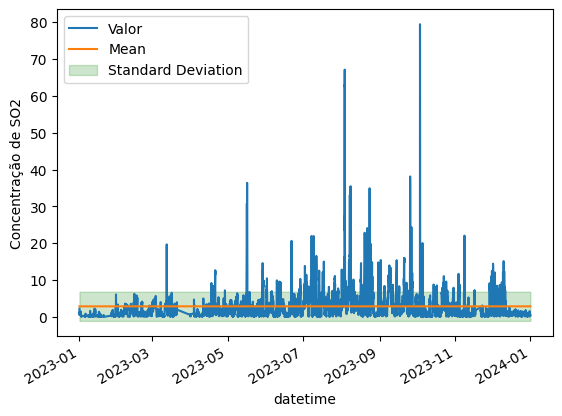

In [29]:
# Importando patches para adicionar item de legenda
import matplotlib.patches as mpatches

# Potando dados válidos e adicionando o eixo de plotagem a uma variável
ax = filtred_so2_df['Valor'].plot(ylabel='Concentração de SO2')

# Plotando a área do desvio padrão
mean = filtred_so2_df['Valor'].mean()
std = filtred_so2_df['Valor'].std()
number_elements = len(filtred_so2_df['Valor'])

ax.fill_between(
    filtred_so2_df.index, number_elements * [mean - std], number_elements * [mean + std],
    color='green', alpha=.2)

# Pegando um valor médio
mean_df = filtred_so2_df[['Valor']].copy()
mean_df.loc[:, 'Mean'] = mean
mean_df = mean_df[['Mean']]
mean_df.plot(ax=ax)

# Adicionando Standard Deviation na legenda
std_legend = mpatches.Patch(color='green', alpha=.2)
handles, labels = ax.get_legend_handles_labels()
handles.append(std_legend)
labels.append('Standard Deviation')
ax.legend(handles, labels)